In [9]:
%matplotlib inline
import sys
sys.path.insert(1,'../Utilities')
# notebook
import matplotlib.pylab as pylab
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
from utils import *
from data import *
from collections import defaultdict
from ecoNameManipulations import *
from foodWebGraphing import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [2]:
data = eiggRawData()
subDf1 = data[['Scientific name', 'Common name', 'Start date year']]
subDf1 = subDf1.dropna(subset=['Start date year'])
subDf1["Start date year"] = subDf1["Start date year"].astype(np.int32)
subDf1Year = subDf1[(subDf1['Start date year'] > 2010.0)]
subDf1Year.tail(100)
print(len(subDf1Year['Scientific name'].unique()))

subDf1Year = subDf1Year[['Scientific name', 'Common name','Start date year']]
subDf1Year["Start date year"] = subDf1Year["Start date year"].astype(np.int32)
finalDf = subDf1Year[(subDf1Year['Start date year'] > 2015.0)]
finalDf.tail()

scientific = list(finalDf['Scientific name'])
common = list(finalDf['Common name'])

mapping = {}
for i in range(min(len(scientific), len(common))):
    mapping[scientific[i]] = common[i]
mapping['Delphinidae'] = "Dolphin"
mapping['Arion (Carinarion) circumscriptus'] = "Slug"

1065


C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (9,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
mapping

{'Pieris napi': 'Green-veined White',
 'Crex crex': 'Corncrake',
 'Coenonympha pamphilus': 'Small Heath',
 'Pipistrellus pipistrellus': 'Common Pipistrelle',
 'Boloria selene': 'Small Pearl-bordered Fritillary',
 'Phocoena phocoena': 'Common Porpoise',
 'Maniola jurtina': 'Meadow Brown',
 'Pararge aegeria': 'Speckled Wood',
 'Polyommatus icarus': 'Common Blue',
 'Halichoerus grypus': 'Grey Seal',
 'Hyacinthoides non-scripta': 'Bluebell',
 'Aglais io': 'Peacock',
 'Delphinidae': 'Dolphin',
 'Aurelia aurita': 'Moon jelly',
 'Omocestus viridulus': 'Common Green Grasshopper',
 'Argynnis aglaja': 'Dark Green Fritillary',
 'Vanessa cardui': 'Painted Lady',
 'Vanessa atalanta': 'Red Admiral',
 'Arion (Arion) flagellus': 'Green-soled Slug',
 'Deroceras (Deroceras) reticulatum': 'Netted Field Slug',
 'Arion (Kobeltia) owenii': 'Tawny Soil Slug',
 'Arion (Arion) ater': 'Large Black Slug',
 'Balaenoptera acutorostrata': 'Minke Whale',
 'Bufo bufo': 'Common Toad',
 'Lissotriton helveticus': 'Palma

In [5]:
usable = set(list(map(lambda x: cleanSpeciesName(x,False), mapping.keys())))

C:\Users\davie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (9,22) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


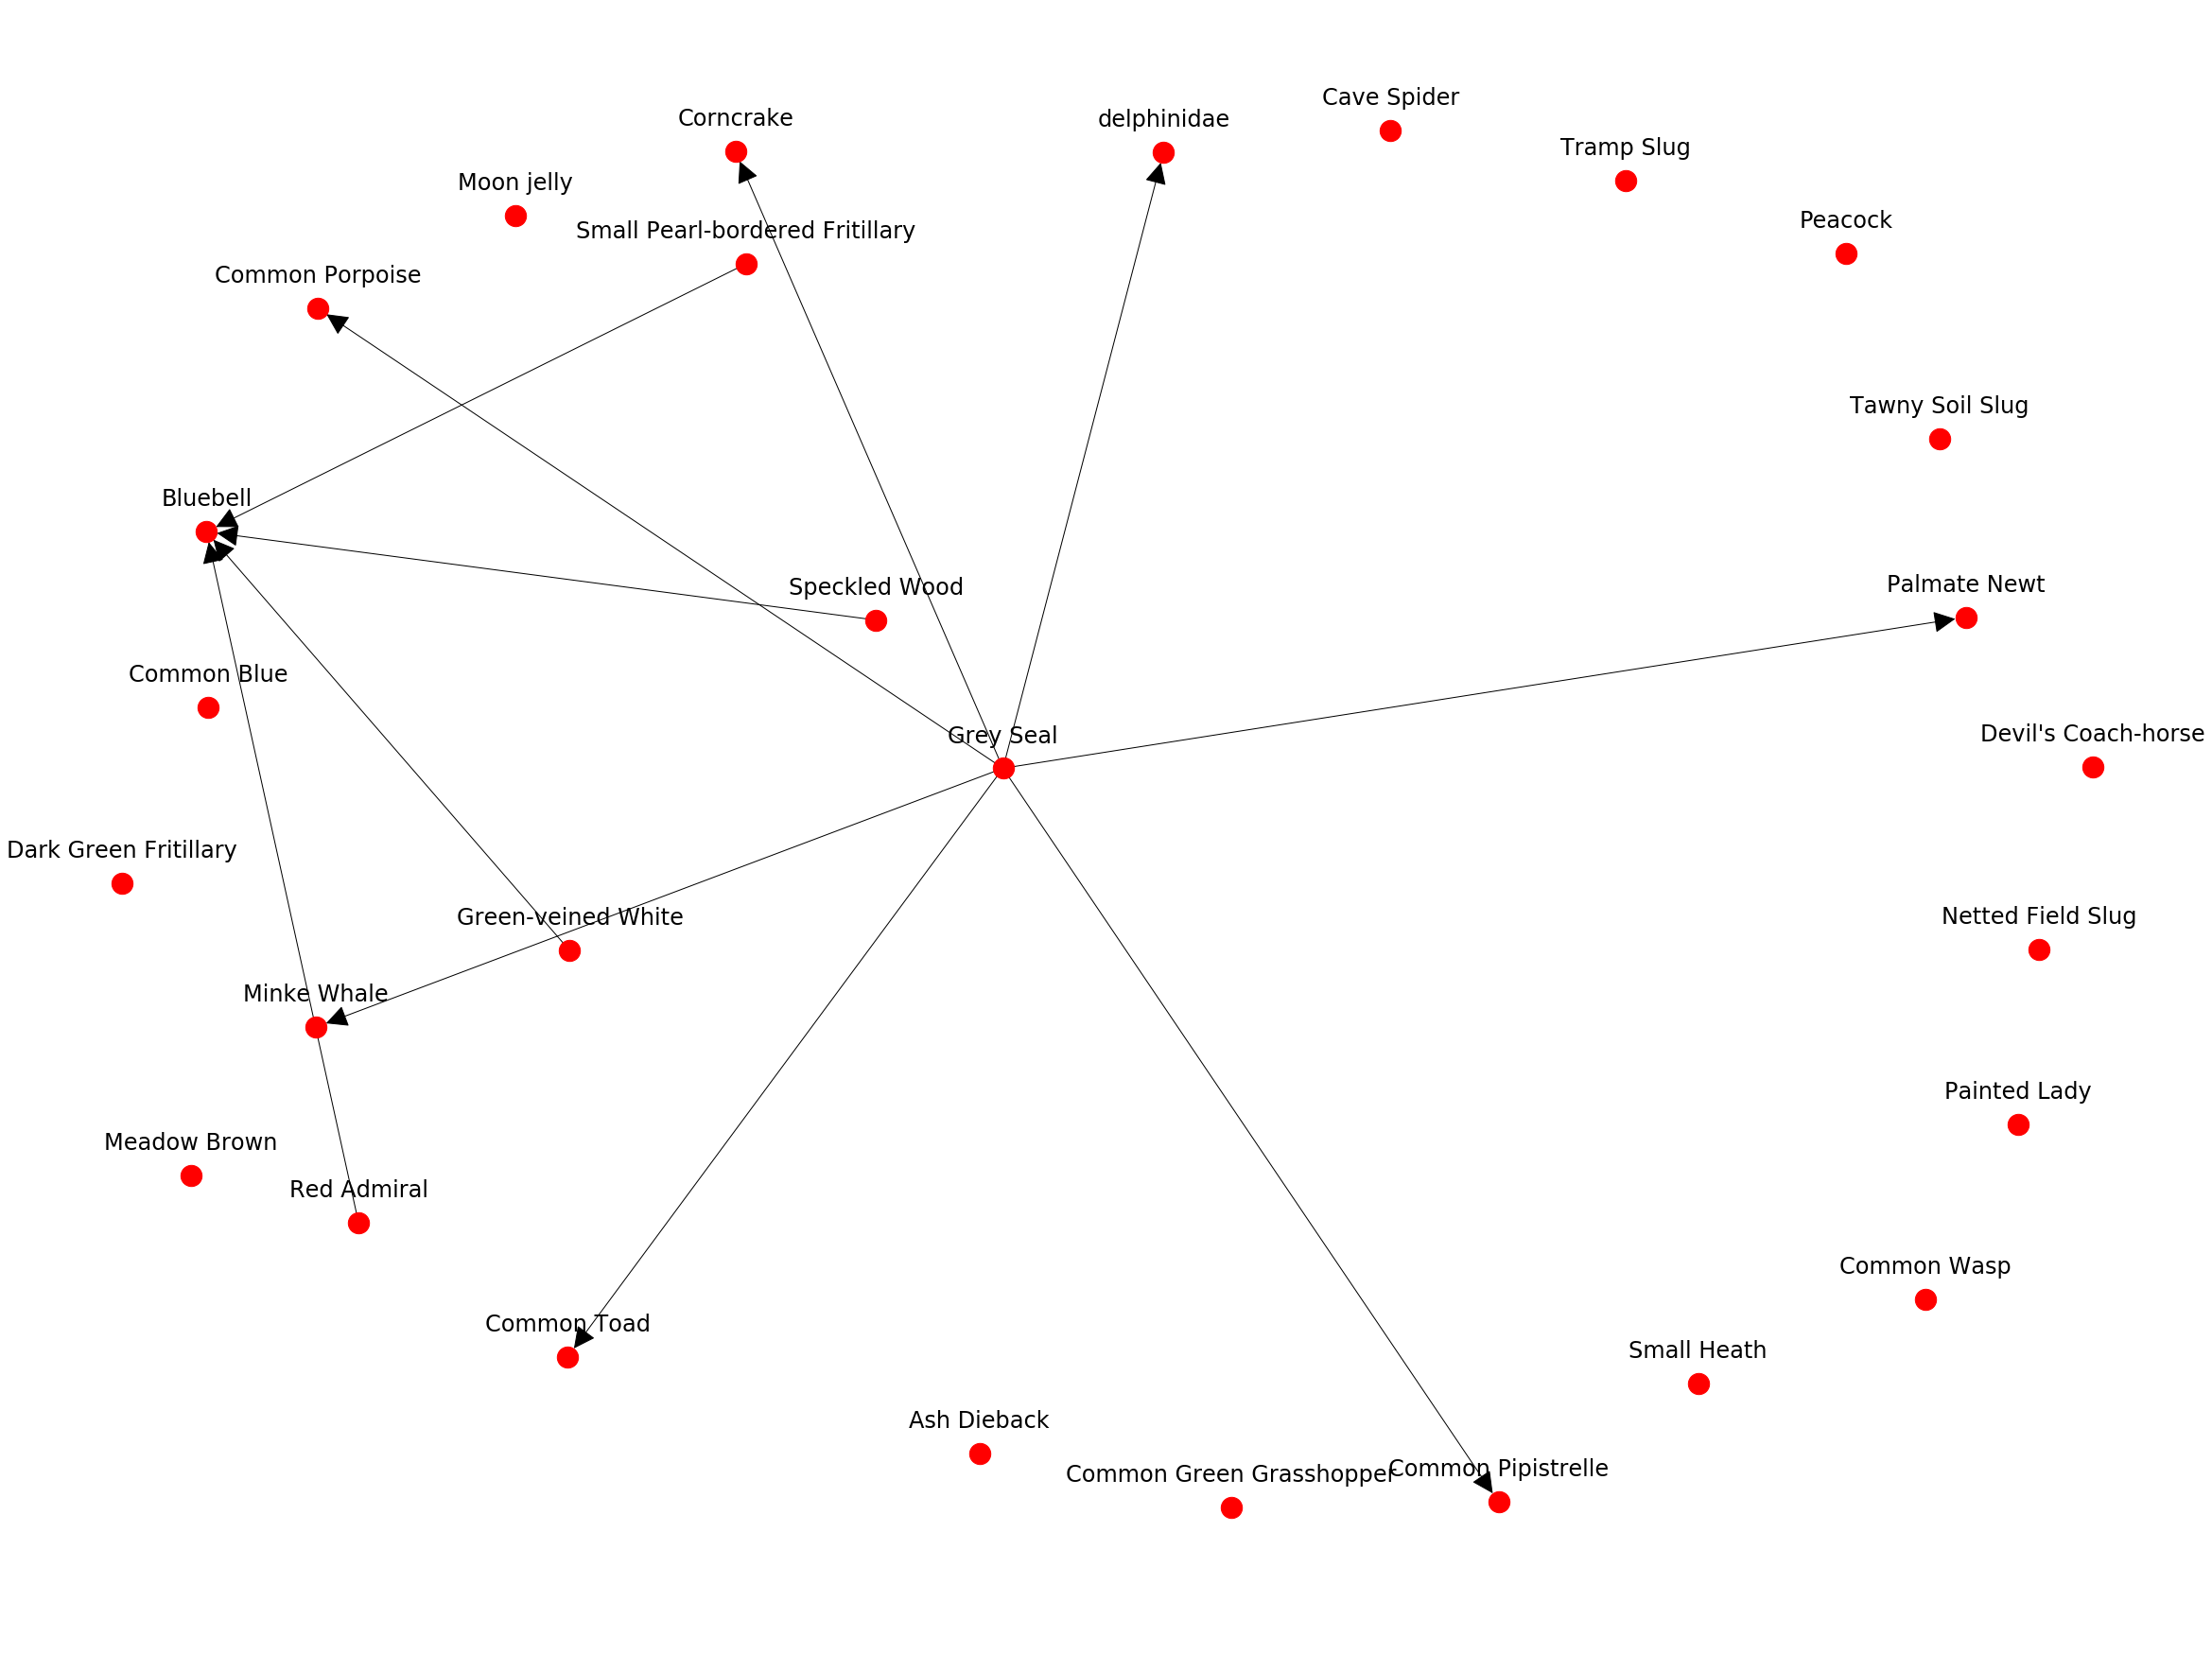

In [12]:
G,mapping = graphFoodWeb(specificity="phylum",dateRange=(2016,2020),directed=True,includeIsolates=True)

allNodes = G.nodes()
removeList = []
for item in allNodes:
    if item not in usable:
        removeList.append(item)

for item in removeList:
    G.remove_node(item)
pos=nx.spring_layout(G,k=1)
nx.draw(G,pos,node_size=500,arrowsize=50,arrowstyle='-|>',node_color='red')
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=mapping[label],horizontalalignment='center',fontsize=24)

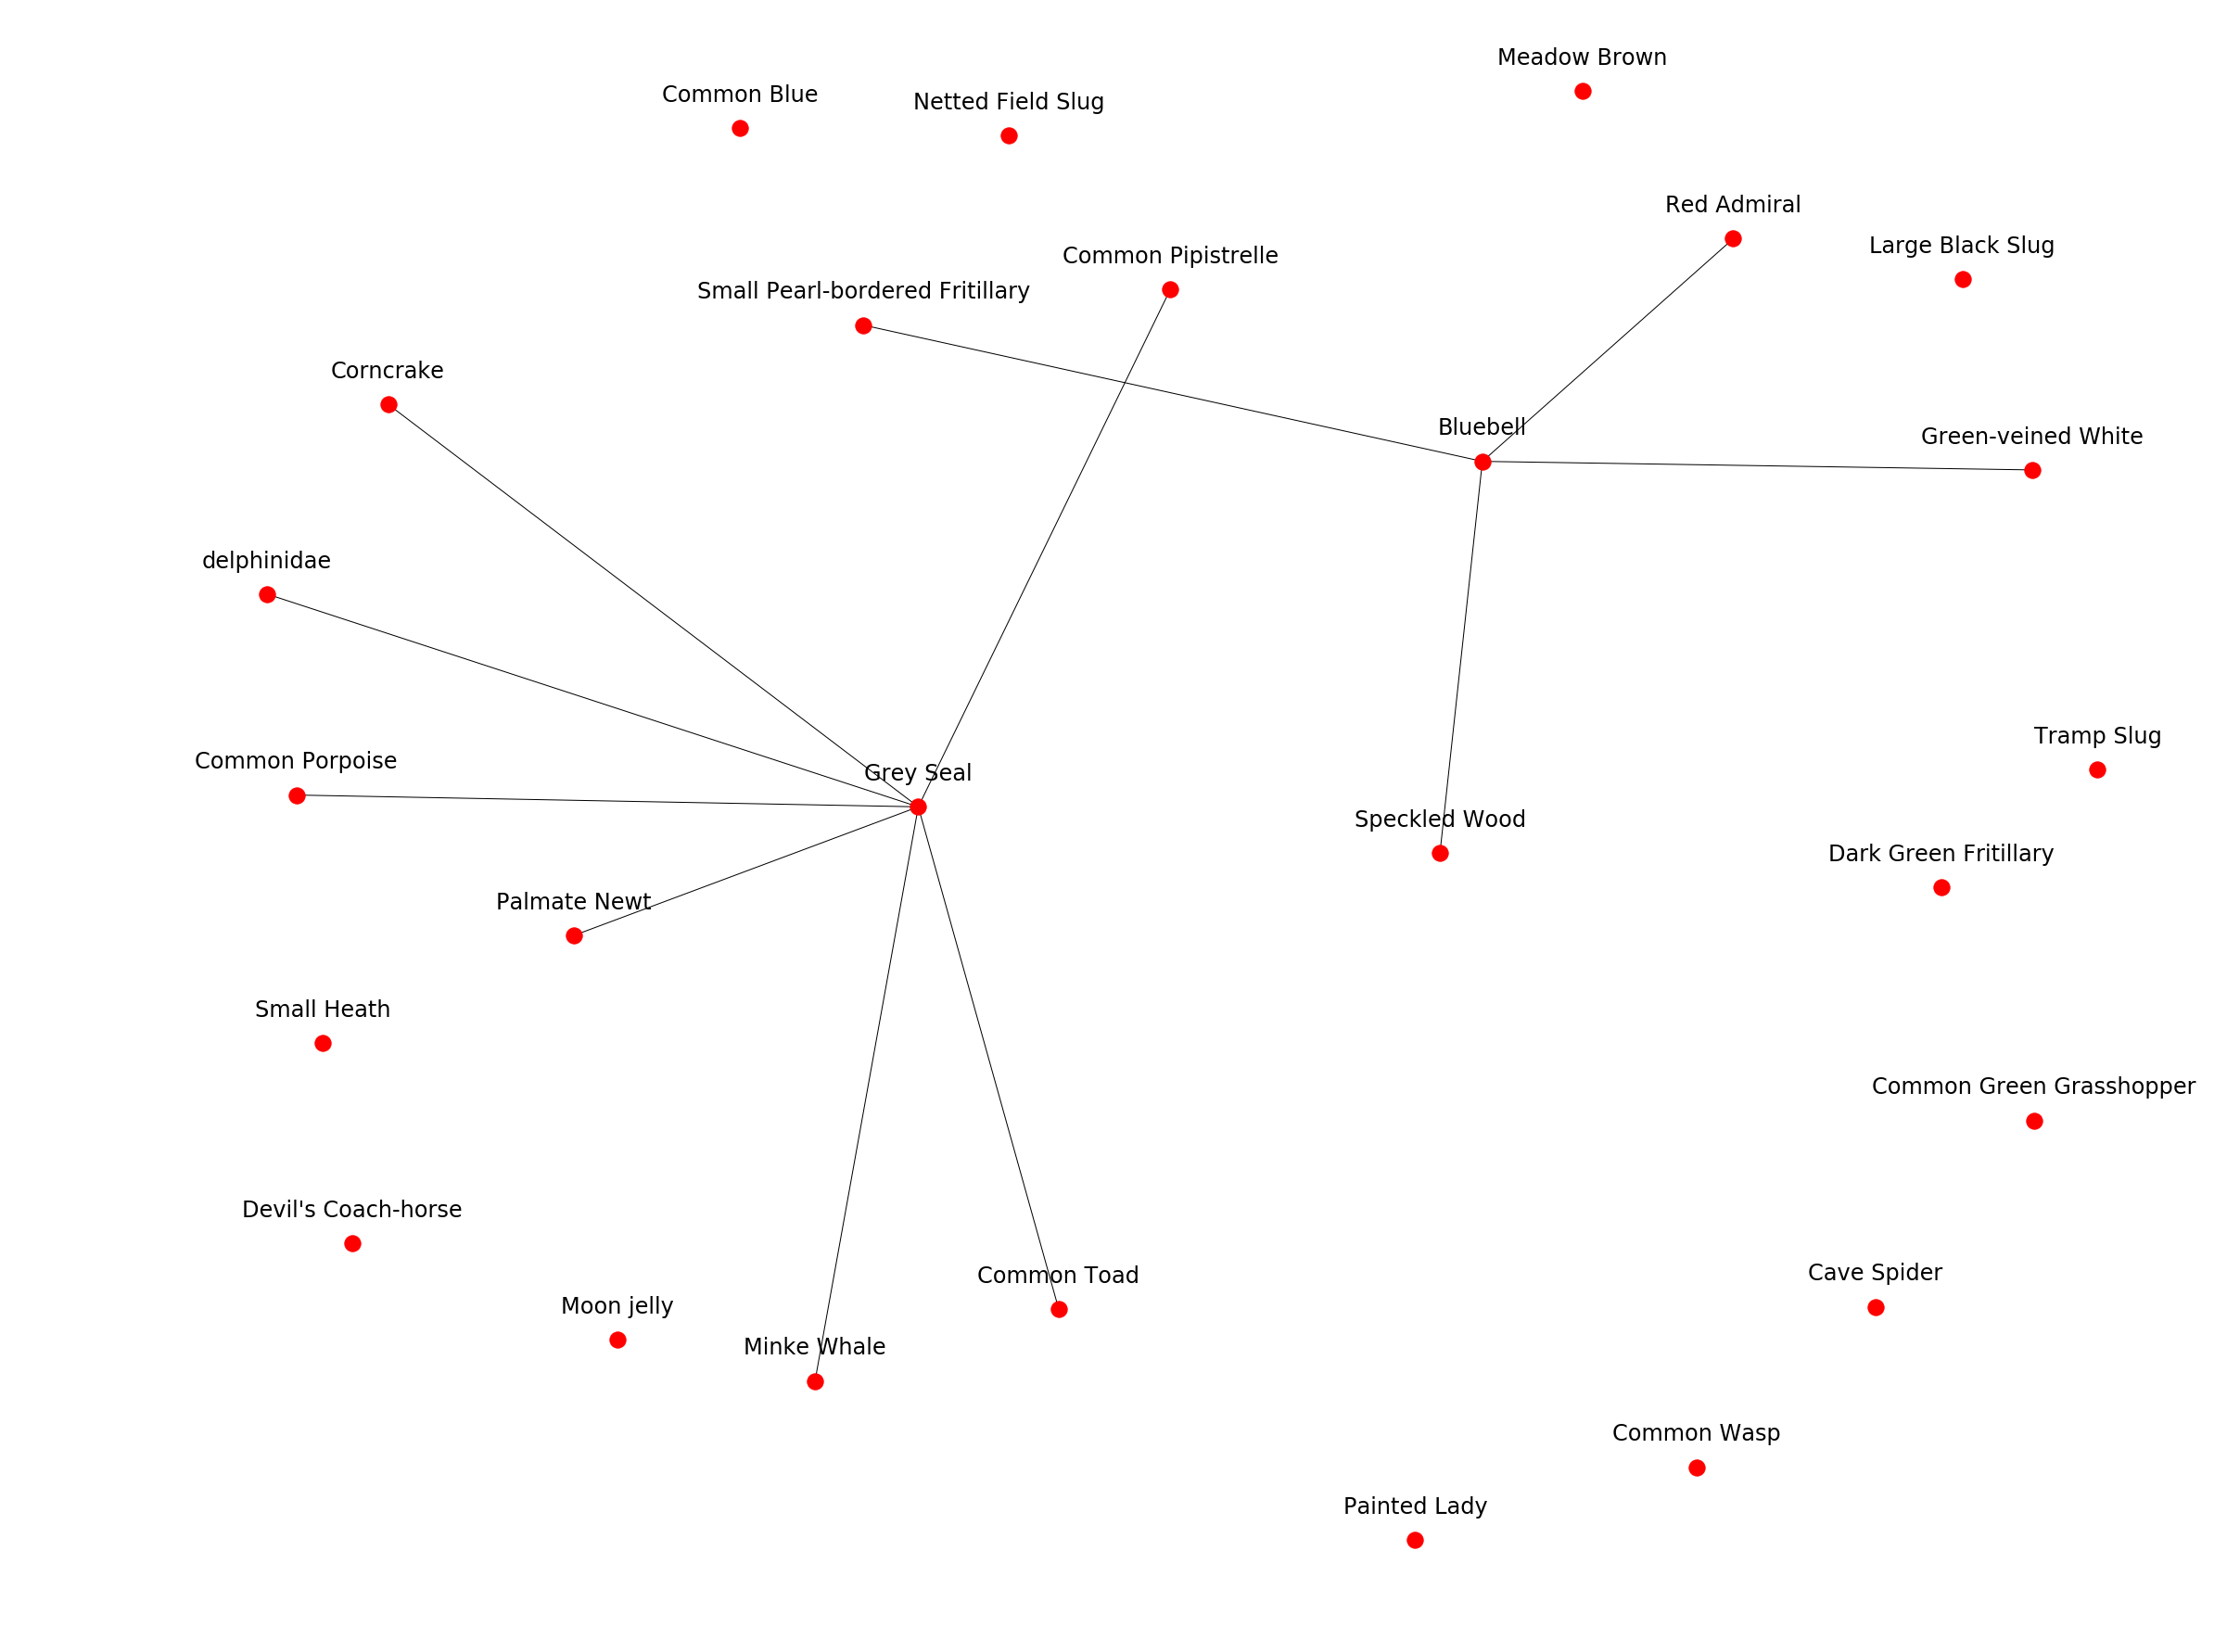

In [14]:
pos=nx.spring_layout(G,k=1)
nx.draw(G,pos)
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=mapping[label],horizontalalignment='center',fontsize=24)